# Módulo: MODELOS DE INTELIGENCIA ARTIFICIAL
## Ejercicio práctico 1.
## Sistema Basado en Reglas   
### Análisis de la calidad del aire

De forma similar a lo realizado en el notebook SBR_IRIS, construye un sistema de clasificación de la calidad del aire (AirQuality - AQI) en función de la cantidad de Ozono detectado en el mismo.   
Los valores del nivel de AQI se muestran en la siguiente tabla:  


| NIVEL AQI | RANGO-DESCRIPCIÓN|
|:---------:|:----------------:|
|   BUENO   |     0 - 50       |
| MODERADO  |    51 - 100      |
|CONTAMINADO|   101 - 150      |
|  INSANO   |   151 - 200      |
| PELIGROSO |       > 200      |

Se pide intentar establecer la clasificación según la tabla anterior en base a alguna de las características que conforman el dataset (Valor de O2, Valor de CO, Valor de NO2, Valor de PM2.5, Longitud y Latitud).   
Como los datos son numéricos y no faltan valores, no se requiere ningún procesamiento previo.   

Nuestro objetivo es predecir el AQI, por lo que esta tarea sería de clasificación o de regresión, pero en este caso vamos a tratar de establecer un SBR basado en una de las variables independientes citadas.


<u>Nota sobre la característica ***PM2.5***</u> :   
Este valor se corresponde con la concentración del material particulado (*PM - Particulate Matter*) de la fracción de tamaño PM2,5 (2.5 micrometros), el cúal se encuentra íntimamente asociado a problemas de salud dado que entre sus efectos aparecen impactos claros sobre las enfermedades cardiacas y pulmonares.   

Importamos librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ocultamos los warnings de las librerías
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------

Cargamos dataset *airquality.csv*

In [2]:
# Cargamos el dataset
data = pd.read_csv('datasets/airquality.csv')

Mostramos los primeros registros

In [3]:
data.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


Asignación (mapeo) del nivel de calidad según los valores del mismo

In [4]:
def ClasificarAQIValue(reg):
    if reg['AQI Value'] <= 50:
        return "Bueno"
    elif 50 < reg['AQI Value'] <= 100:
        return "Moderado"
    elif 101 < reg['AQI Value'] <= 150:
        return "Contaminado"
    elif 151 < reg['AQI Value'] <= 200:
        return "Insano"
    elif reg['AQI Value'] > 200:
        return "Peligroso"
    else:
        return ""

Análisis breve del dataset (EDA)


In [5]:
data.info()
data.duplicated(keep=False)
data[data.duplicated(keep=False)]

#¿Eliminar duplicados?
#data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng


Voy a crear un gráfico de dispersión para cada variable para ver la relación que tienen con nuestra variable objetivo que es AQI Value:

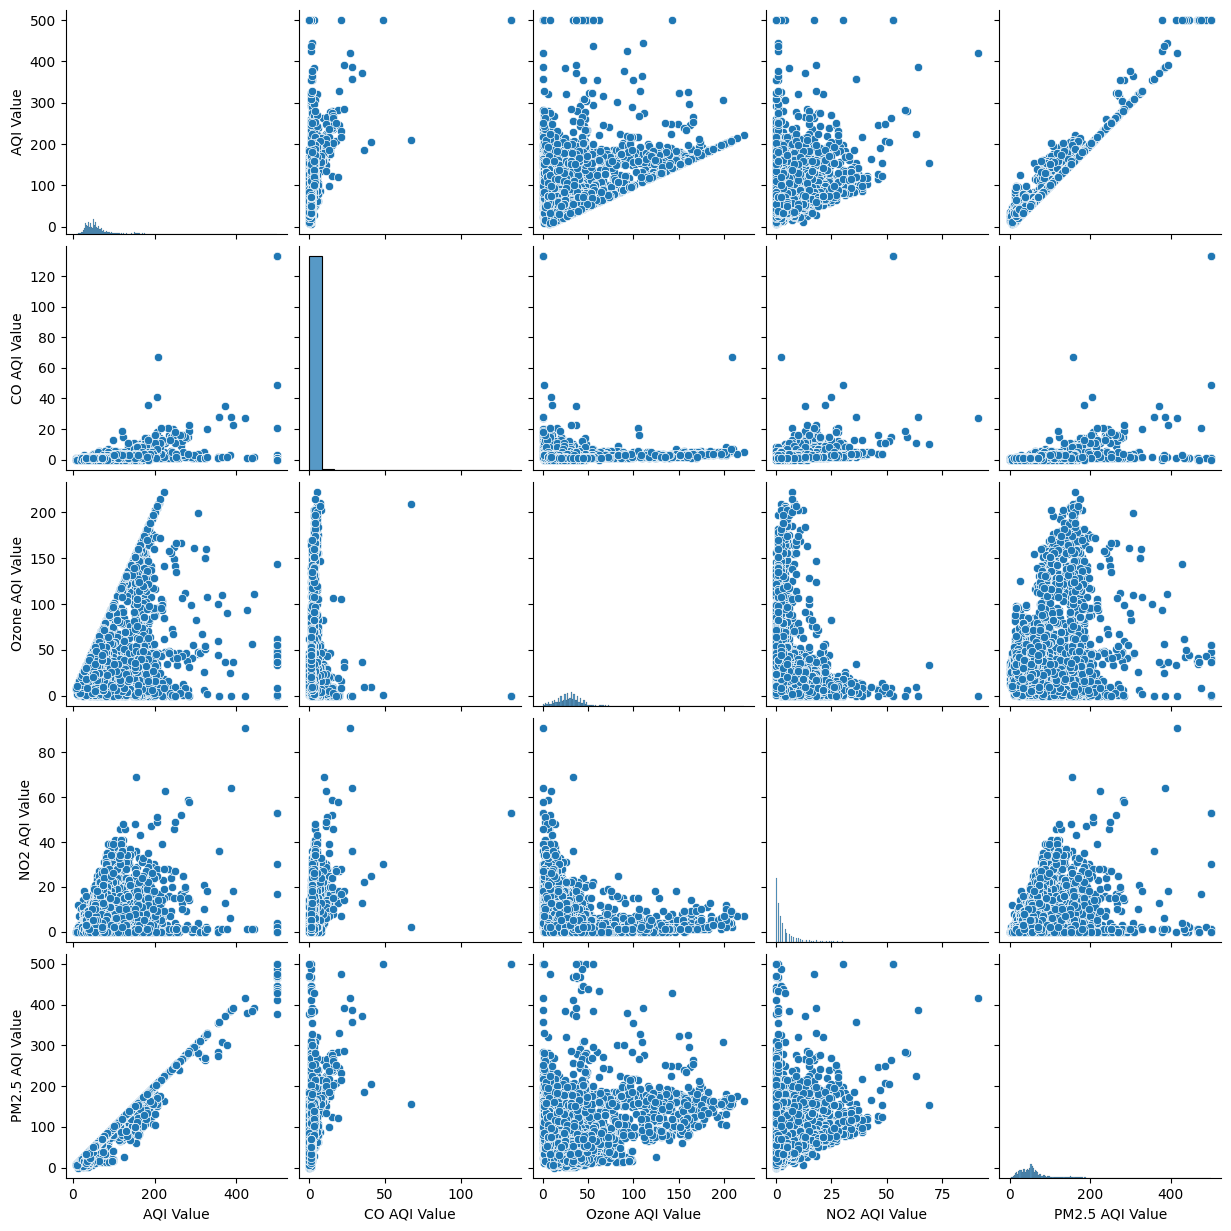

In [6]:
sns.pairplot(data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']])
plt.show()

Fijándonos en la primera columna del gráfico podemos ver la relación de todos los campos del dataset con nuestra variable objetivo que es 'AQI Value'.<br>
Si comparamos el gráfico donde se relaciona el campo 'PM2.5 AQI Value' con nuestra variable objetivo 'AQI Value' podemos ver que cuanto mayor es el valor del campo 'PM2.5 AQI Value' mayor es también el valor de nuestra variable objetivo, mientras que el resto de gráficas donde vemos la relación de nuestra variable objetivo con el resto de campos no denota esa proporcionalidad sino que más bien parece que no se relacionan de ninguna forma lógica, al menos a simple vista.

En este ejercicio actualmente tenemos los datos de la columna 'AQI Value' que es nuestra variable objetivo, así que voy a intentar predecir el valor de esta considerando la relación de propocionalidad que tiene con la variable 'PM2.5 AQI Value'. 

Para ello voy a obtener la constante de proporcionalidad media de la relación de estas dos columnas y voy a utilizarla para que mi sistema basado en reglas sea capaz de predecir el nivel del aire en base a nuestra variable 'PM2.5 AQI Value' dividida por la constante de proporcionalidad media, creando una nueva columna que voy a llamar 'AQI Value Predicted' que va a llevar los valores que se contemplan en la tabla que se muestra en el enunciado ('BUENO', 'MODERADO', 'CONTAMINADO', 'INSANO' y 'PELIGROSO').


In [7]:
# Voy a crear una nueva columna en el dataframe que almacene el resultado de la división entre el valor que hay en 'PM2.5 AQI Value' y el que hay en 'AQI Value' y llamaré a la columna 'Constante Propor AQI_PM25':
data['Constante Propor AQI_PM25'] = data['PM2.5 AQI Value'] / data['AQI Value'] # (k=a/b)
# Ahora voy a calcular la media de la nueva columna que contiene el valor de la constante de proporcionalidad calculada para cada registro
constante_proporcionalidad = data['Constante Propor AQI_PM25'].mean()
print(f'La media de la constante de proporcionalidad es: {constante_proporcionalidad}')

La media de la constante de proporcionalidad es: 0.9292211028956645


<h3>Definición de reglas</h3>

1. En primer lugar voy a crear una columna utilizando el método creado anteriormente que clasifica el nivel del aire en base a los datos que tenemos en la columna 'AQI Value' siguiendo la tabla proporcionada en el enunciado. Esta nueva columna llevará el nombre de: 'AQI Value Traducido'
2. Por otro lado voy a hacer crear otra columna bajo el nombre de 'AQI Value Predicted', que seguirá el mismo proceso que comento en el punto 1. pero esta vez trabajando con los valores de la columna 'PM2.5 AQI Value' y la constante de proporcionalidad que hemos calculado previamente.
3. Voy a comparar los resultados de las columnas recién creadas 'AQI Value Traducido' y 'AQI Value Predicted' para ver la fiabilidad de mi sistema basado en reglas.


Pequeña explicación de la lógica que llevo a cabo en el sistema:<br><br>
x / y= k <br>
Ejemplo: 7 / 10 = 0,7	<br><br>
Tenemos un registro de nuestro dataframe donde: <br>'x' es el valor nuestra columna 'PM2.5 AQI Value'. <br>'y' es el valor de la columna 'AQI Value'. <br>'k' es la constante de proporcionalidad para este registro. <br><br>Por lo tanto: 

x = y * k -> 7 = 10 * 0,7<br>
x / k = y -> 7 / 0,7 = 10<br>



In [8]:
# He intentado crear un método para aplicar en ambos casos (punto 1 y punto 2) pero tengo problemas al aplicar el metodo apply sobre una sola columna, voy a crear un nuevo método para el punto 2
def ClasificarCalidadAireEnBaseAPM25(reg):
    if (reg['PM2.5 AQI Value'] / constante_proporcionalidad) <= 50: # estamos obteniendo el valor de la columna 'AQI Value' (x/k=y)
        return "Bueno"
    elif 50 < (reg['PM2.5 AQI Value'] / constante_proporcionalidad) <= 100:
        return "Moderado"
    elif 101 < (reg['PM2.5 AQI Value'] / constante_proporcionalidad)<= 150:
        return "Contaminado"
    elif 151 < (reg['PM2.5 AQI Value'] / constante_proporcionalidad) <= 200:
        return "Insano"
    elif (reg['PM2.5 AQI Value'] / constante_proporcionalidad) > 200:
        return "Peligroso"
    else:
        return ""


Aplicación de reglas

In [9]:
data['AQI Value Traducido'] = data.apply(ClasificarAQIValue, axis=1)

data['AQI Value Traducido'].head()

0    Moderado
1       Bueno
2       Bueno
3    Moderado
4       Bueno
Name: AQI Value Traducido, dtype: object

In [10]:
data['AQI Value Predicted'] = data.apply(ClasificarCalidadAireEnBaseAPM25, axis=1)
data['AQI Value Predicted'].head()

0    Moderado
1       Bueno
2       Bueno
3    Moderado
4       Bueno
Name: AQI Value Predicted, dtype: object

Visualización gráfica

AQI Value Traducido
Bueno          7708
Moderado       7081
Contaminado     866
Insano          776
Peligroso       193
                 71
Name: count, dtype: int64


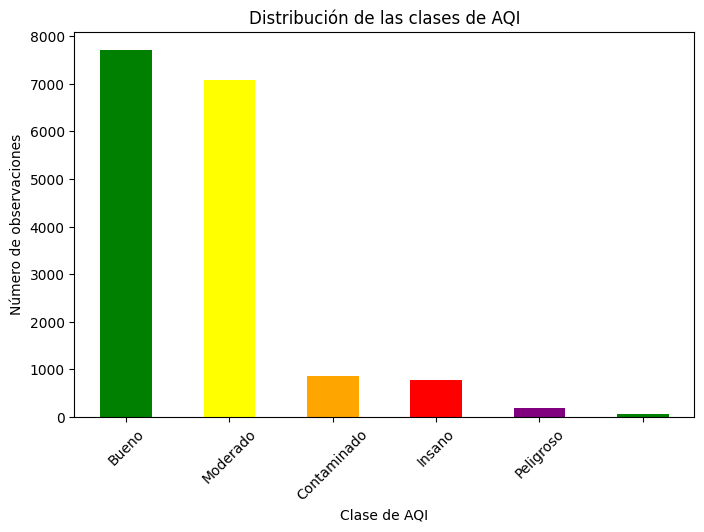

In [11]:
# Sacamos el número de cada uno de los valores posibles que puede tener el nuevo campo 'AQI Value Traducido' que se basa en la clasificación propuesta por el ejercicio
aqi_class_counts = data['AQI Value Traducido'].value_counts()
print(aqi_class_counts)
# Creo un gráfico de barras que muestre el número de ocurrencias de cada posible valor del campo 'AQI Value Traducido'
plt.figure(figsize=(8, 5))
aqi_class_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'purple'])
plt.title('Distribución de las clases de AQI')
plt.xlabel('Clase de AQI')
plt.ylabel('Número de observaciones')
plt.xticks(rotation=45)
plt.show()


AQI Value Predicted
Moderado       7638
Bueno          6925
Contaminado     990
Insano          843
Peligroso       248
                 51
Name: count, dtype: int64


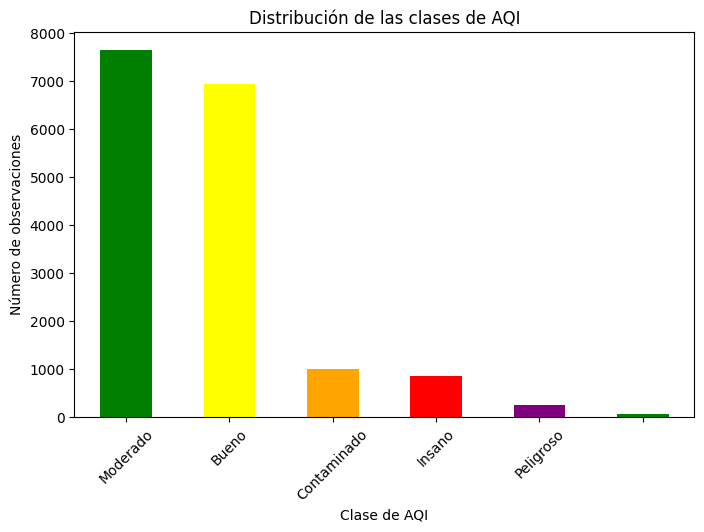

In [12]:
# Hago lo mismo con los resultados de la columna 'AQI Value Predicted'
aqiPredicted_class_counts = data['AQI Value Predicted'].value_counts()
print(aqiPredicted_class_counts)
# Creo un gráfico de barras que muestre el número de ocurrencias de cada posible valor del campo 'AQI Value Predicted'
plt.figure(figsize=(8, 5))
aqiPredicted_class_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'purple'])
plt.title('Distribución de las clases de AQI')
plt.xlabel('Clase de AQI')
plt.ylabel('Número de observaciones')
plt.xticks(rotation=45)
plt.show()

Por último voy a ver la exactitud de mi sistema basado en reglas haciendo una comparativa sobre el número de casos que se dan para cada valor de la clasificación:

In [13]:
# Comparar si los valores en ambas columnas son iguales
comparacion = data['AQI Value Predicted'] == data['AQI Value Traducido']

# Calcular la precisión (proporción de coincidencias)
accuracy = comparacion.mean()

print(f"Precisión de las predicciones: {accuracy:.3f}")

Precisión de las predicciones: 0.891


Mi sistema basado en reglas tiene una precisión del 89,1%.
